## Observations and Insights 

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, on ="Mouse ID")
# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [110]:
# Checking the number of mice.
mice_table = study_df["Mouse ID"].unique()

mice_count = len(mice_table)
mice_count


249

In [111]:
study_df["con_mouseid"] = study_df["Mouse ID"]+'_'+study_df["Timepoint"].astype(str)
study_df["duplicate"] = study_df["con_mouseid"].value_counts(dropna=False)
study_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,con_mouseid,duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403_0,NaN
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403_5,NaN
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403_10,NaN
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403_15,NaN
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403_20,NaN
5,k403,Ramicane,Male,21,16,25,33.464577,1,k403_25,NaN
6,k403,Ramicane,Male,21,16,30,31.099498,1,k403_30,NaN
7,k403,Ramicane,Male,21,16,35,26.546993,1,k403_35,NaN
8,k403,Ramicane,Male,21,16,40,24.365505,1,k403_40,NaN
9,k403,Ramicane,Male,21,16,45,22.050126,1,k403_45,NaN


In [112]:

study_df = study_df.fillna(0)
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,con_mouseid,duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403_0,0.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403_5,0.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403_10,0.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403_15,0.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403_20,0.0


In [113]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_df = study_df.loc[[study_df["duplicate"] == 1], :]
duplicate_mice_df.head()

IndexError: Boolean index has wrong length: 1 instead of 1893

In [114]:
# Optional: Get all the data for the duplicate mouse ID. 



In [115]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [116]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarystats = pd.DataFrame(study_df.groupby("Drug Regimen").count())
summarystats.head()



,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,con_mouseid,duplicate
Drug Regimen,,,,,,,,,
Capomulin,230,230,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186,186,186


In [118]:
#Use groupby to create summary stats by drug regime, add results into columns in summarystats

summarystats["Mean"] = pd.DataFrame(study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().round(2))
summarystats["Median"] = pd.DataFrame(study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().round(2))
summarystats["Standard Deviation"] = pd.DataFrame(study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().round(2))
summarystats["Variance"] = pd.DataFrame(study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().round(2))
summarystats["SEM"] = pd.DataFrame(study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().round(2))


summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
summarystats = summarystats.rename(columns = {"Mouse ID" : "Mouse ID Count"})

summarystats.head()

,Mouse ID Count,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.68,41.56,4.99,24.95,0.33
Ceftamin,178,52.59,51.78,6.27,39.29,0.47
Infubinol,178,52.88,51.82,6.57,43.13,0.49
Ketapril,188,55.24,53.70,8.28,68.55,0.60
Naftisol,186,54.33,52.51,8.13,66.17,0.60


## Bar and Pie Charts

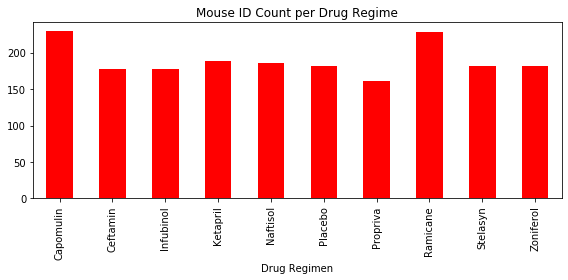

In [120]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

summarystats["Mouse ID Count"].plot(kind="bar", figsize=(8,4), color = "red", legend=False)
plt.title("Mouse ID Count per Drug Regime")

plt.tight_layout()

Text(0.5, 0, 'Drug Regime')

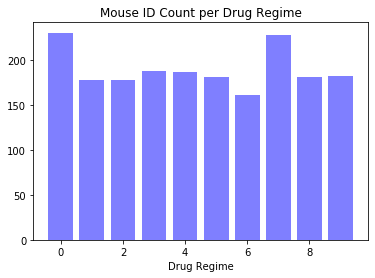

In [157]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Mouse = summarystats["Mouse ID Count"]
x_axis = np.arange(len(Mouse))
plt.bar(x_axis, Mouse, color='b', alpha=0.5, align="center")
plt.title("Mouse ID Count per Drug Regime")
plt.xlabel("Drug Regime")

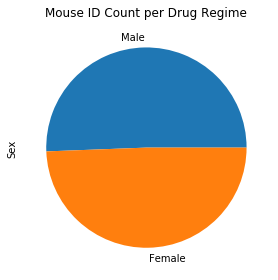

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
label = ["Male", "Female"]
Sex_Count = study_df["Sex"].value_counts()
Sex_Count.plot.pie(y="Sex_Count", figsize=(8,4))
plt.title("Mouse ID Count per Drug Regime")

plt.tight_layout()

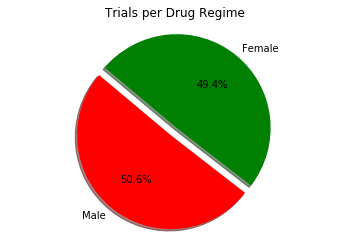

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["red","green"]
label = ["Male", "Female"]
explode = (0.1,0)
Sex_Count = study_df["Sex"].value_counts()

plt.pie(Sex_Count, explode=explode, labels=label, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


plt.axis("equal")

# Set a title
plt.title("Trials per Drug Regime")

plt.show()

## Quartiles, Outliers and Boxplots

In [134]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filtered_df = study_df.loc[(study_df["Drug Regimen"] == "Capomulin") | (study_df["Drug Regimen"] == "Ramicane") | 
                           (study_df["Drug Regimen"] == "Infubinol") | (study_df["Drug Regimen"] == "Ceftamin"), :]

filtered_df = filtered_df.sort_values("Timepoint", ascending = True)


filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='last')
    
filtered_df.head(10)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,con_mouseid,duplicate
1583,u153,Ceftamin,Female,11,25,0,45.000000,0,u153_0,0.0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0,t573_0,0.0
594,b447,Ceftamin,Male,2,30,0,45.000000,0,b447_0,0.0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0,x226_0,0.0
1205,m756,Infubinol,Male,19,30,5,47.010364,1,m756_5,0.0
1314,o813,Infubinol,Male,24,28,5,45.699331,0,o813_5,0.0
449,w678,Ramicane,Female,5,24,5,43.166373,0,w678_5,0.0
940,h531,Ceftamin,Male,5,27,5,47.784682,0,h531_5,0.0
669,c326,Infubinol,Female,18,25,5,36.321346,0,c326_5,0.0
1616,v339,Infubinol,Male,20,26,5,46.250112,0,v339_5,0.0


In [158]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


# Determine quartiles
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df
  
    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,con_mouseid,duplicate


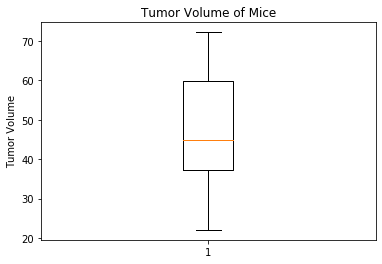

In [148]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

In [149]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = study_df.loc[(study_df["Drug Regimen"] == "Capomulin"),:]

Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,con_mouseid,duplicate
10,s185,Capomulin,Female,3,17,0,45.000000,0,s185_0,0.0
11,s185,Capomulin,Female,3,17,5,43.878496,0,s185_5,0.0
12,s185,Capomulin,Female,3,17,10,37.614948,0,s185_10,0.0
13,s185,Capomulin,Female,3,17,15,38.177232,0,s185_15,0.0
14,s185,Capomulin,Female,3,17,20,36.866876,0,s185_20,0.0


## Line and Scatter Plots

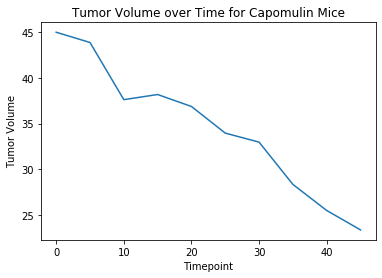

In [150]:
Capomulin_01_df = Capomulin_df.loc[(Capomulin_df["Mouse ID"] == "s185"),:]


timepoint = Capomulin_01_df["Timepoint"]
tumor_volume = Capomulin_01_df["Tumor Volume (mm3)"]


tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show()

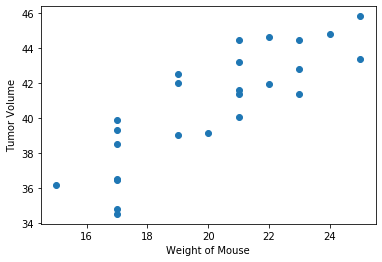

In [154]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

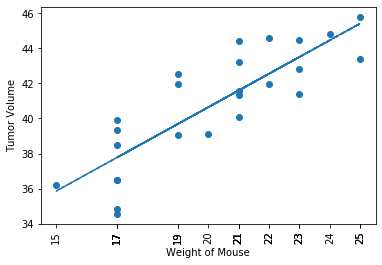

The correlation between weight and tumor value is 0.84


In [156]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
fit = slope * mouse_weight + int

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

correlation = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {correlation}')